In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
cash_in = df[df['type']=='CASH_IN']
cash_in.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0


In [4]:
cash_in.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362253,718,CASH_IN,188888.89,C1459052107,51838.0,240726.89,C1955750585,0.00,0.00,0,0
6362271,718,CASH_IN,27919.60,C562982749,2413.0,30332.60,C240654881,512791.59,484871.98,0,0
6362279,718,CASH_IN,78988.38,C886862695,204464.0,283452.38,C262804200,108724.19,29735.81,0,0
6362298,718,CASH_IN,18000.26,C50108853,63409.0,81409.26,C204102272,28088.61,10088.34,0,0
6362315,718,CASH_IN,96239.74,C759614959,101281.0,197520.74,C1766719169,151109.37,54869.63,0,0


In [5]:
cash_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399284 entries, 389 to 6362315
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1399284 non-null  int64  
 1   type            1399284 non-null  object 
 2   amount          1399284 non-null  float64
 3   nameOrig        1399284 non-null  object 
 4   oldbalanceOrg   1399284 non-null  float64
 5   newbalanceOrig  1399284 non-null  float64
 6   nameDest        1399284 non-null  object 
 7   oldbalanceDest  1399284 non-null  float64
 8   newbalanceDest  1399284 non-null  float64
 9   isFraud         1399284 non-null  int64  
 10  isFlaggedFraud  1399284 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 128.1+ MB


In [6]:
cash_in.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.399284e+06,1.399284e+06,1.399284e+06,1.399284e+06,1.399284e+06,1.399284e+06,1399284.0,1399284.0
mean,2.444901e+02,1.689202e+05,3.590464e+06,3.759379e+06,1.587919e+06,1.467105e+06,0.0,0.0
std,1.429260e+02,1.265083e+05,5.291825e+06,5.287487e+06,3.713923e+06,3.712985e+06,0.0,0.0
min,1.000000e+00,4.000000e-02,0.000000e+00,5.440000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.560000e+02,7.051018e+04,3.776800e+04,2.497569e+05,1.612608e+05,4.274628e+04,0.0,0.0
50%,2.490000e+02,1.434277e+05,1.200093e+06,1.369115e+06,5.471373e+05,3.857514e+05,0.0,0.0
75%,3.450000e+02,2.398991e+05,5.284255e+06,5.450491e+06,1.619594e+06,1.465846e+06,0.0,0.0
max,7.180000e+02,1.915268e+06,3.893942e+07,3.894623e+07,3.555534e+08,3.553814e+08,0.0,0.0


In [7]:
cash_in.shape

(1399284, 11)

C:\Users\ethan\AppData\Local\Temp\ipykernel_14308\1789776515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cash_in, x='isFraud', palette='pastel')


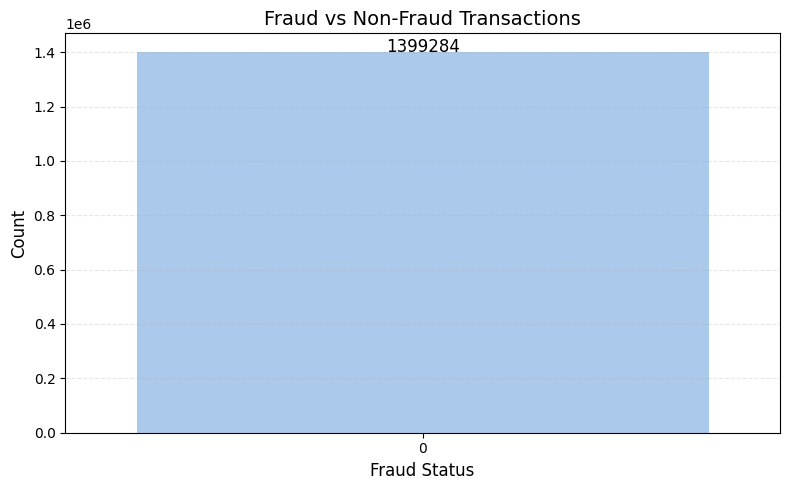

In [8]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=cash_in, x='isFraud', palette='pastel')

# Add the numbers manually using plt.text
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 100, f'{count}', ha='center', color='black', fontsize=12)

# Set titles and labels
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, color='black')
plt.xlabel('Fraud Status', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()